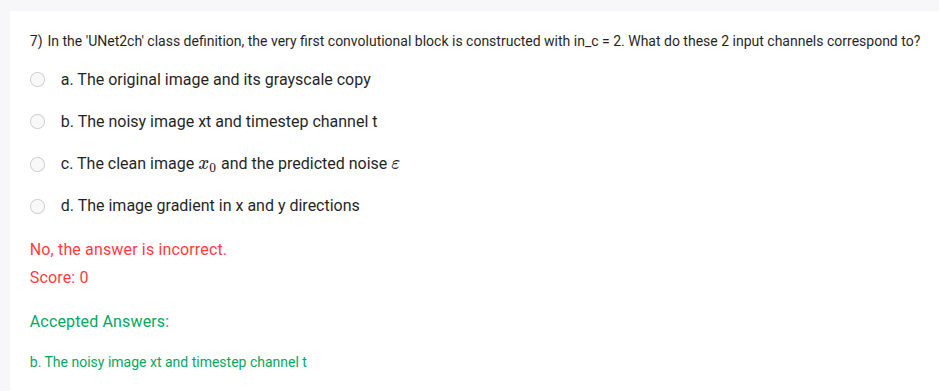

# What is 'UNet2ch' class definition,
The 'UNet2ch' class usually refers to a variant of the U-Net architecture adapted for tasks like image segmentation where the output has 2 channels, often representing binary segmentation masks or logits for two classes.



# What is Unet architecture
The **U-Net architecture** is a type of convolutional neural network (CNN) originally designed for **semantic segmentation** tasks, especially in the field of **biomedical image analysis**. It was introduced in the 2015 paper:

> **"U-Net: Convolutional Networks for Biomedical Image Segmentation"** by Ronneberger et al.

---

### 🧠 **What U-Net Does**

U-Net segments an input image into different classes **pixel-by-pixel**, i.e., it assigns a label to each pixel in the image (e.g., background, tumor, road, etc.).

---

### 🏗️ **U-Net Architecture Overview**

U-Net is shaped like a **U** and consists of two main parts:

#### 1. **Contracting Path (Encoder)**

This part captures the context of the image — similar to a standard CNN.

* Repeated blocks of:

  * 2 × 3×3 convolutions (with ReLU)
  * 1 × 2×2 max pooling (downsampling)
* Doubles the number of feature channels at each downsampling.

#### 2. **Expanding Path (Decoder)**

This part enables precise localization — reconstructs the image using upsampling.

* Each step consists of:

  * 2×2 transposed convolution (upsampling, reduces channels)
  * Concatenation with the corresponding encoder feature map (**skip connection**)
  * 2 × 3×3 convolutions (with ReLU)

#### 3. **Skip Connections**

* Bridge corresponding layers in the encoder and decoder.
* Help retain spatial information lost during downsampling.

---

### 🖼️ **Visual Representation**

```
Input → [Conv→Conv→Pool] → [Conv→Conv→Pool] → ... 
      ↓                                      ↑
    Skip                                   Skip
      ↓                                      ↑
Output ← [UpConv←Concat←Conv←Conv] ← [UpConv←Concat←Conv←Conv]
```

---

### ⚙️ **Final Layer**

* A **1×1 convolution** at the end maps feature vectors to the desired number of classes per pixel.

---

### ✅ **Key Advantages**

* **Efficient for small datasets** (due to data augmentation and skip connections)
* **Precise segmentation** (due to symmetry and skip connections)
* **End-to-end trainable** for pixel-wise classification

---

### 🧪 Common Applications

* Medical imaging (e.g., MRI tumor segmentation)
* Satellite image segmentation
* Road/lane detection in self-driving cars
* Cell segmentation in microscopy

---


# Solution
The correct answer is:

**b. The noisy image xₜ and timestep channel t**

---

### Explanation:

In the **UNet2ch** class used in **diffusion models (like DDPM)**, the `in_c = 2` in the first convolutional layer typically corresponds to:

1. **xₜ** — the **noisy image** at time step `t`
2. **t** — the **timestep**, often encoded as a channel (e.g., sinusoidal positional embedding, or just a scalar broadcasted to match image shape)

These two inputs are concatenated along the channel dimension, resulting in **2 channels** as input to the U-Net.

So:

* **xₜ** has shape `[C, H, W]=> [#of channels(RGB or Grayscale), Height, Width]` (usually 1 or 3 channels) 
* **t (or its embedding)** is expanded/broadcasted to shape `[1, H, W]`
* Combined: `in_c = C + 1 = 2` if `C = 1` (like in grayscale images)

---

### Why the other options are incorrect:

* **(a)**: The model doesn’t use a grayscale copy separately.
* **(c)**: We never input both `x₀` (clean image) and `ε` (predicted noise) to the network — `ε` is what the network **predicts**, not what it **takes as input**.
* **(d)**: Gradients in x and y directions are not used here.


